In [22]:
# Reading the dataset
# Importing pandas as pd
import pandas as pd
# Loading the dataset
mydata = pd.read_csv('E:/SLTechDocs/Data/Flood.csv')

In [ ]:
seed = 7 # To make reproducible the codes

In [23]:
mydata.head()

,Time,Area,RH,ET,P,AT,SM,GHF
0,1/1/2005,3563530.00,65.396004,0.000003,3.757262,12.265436,1.301278,17.165691
1,1/2/2005,3474497.25,68.874268,0.000002,4.382504,13.751855,1.320082,18.168137
2,1/3/2005,3467959.75,77.067459,0.000004,17.027948,10.879114,1.377332,1.645442
3,1/4/2005,3605078.50,73.839661,0.000005,40.451202,6.159296,1.406343,-8.523001
4,1/5/2005,3945098.25,79.737579,0.000005,23.137531,2.658197,1.457837,-16.406815


In [24]:
mydata.describe()

,Area,RH,ET,P,AT,SM,GHF
count,3.994000e+03,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000
mean,2.828388e+06,15.020703,0.000024,3.134611,14.031194,1.222583,0.558555
std,1.235075e+06,594.092895,0.000017,5.791662,10.815100,0.146059,12.848126
min,1.170620e+06,-9999.000000,-0.000001,0.000000,-15.540076,0.698136,-68.185898
25%,1.863795e+06,42.761028,0.000007,0.055491,5.142480,1.134451,-5.466526
50%,2.569146e+06,49.047647,0.000021,0.479799,14.949548,1.248526,2.817404
75%,3.612540e+06,56.245806,0.000040,3.720712,23.502130,1.332297,8.202606
max,6.852320e+06,94.331871,0.000062,72.185623,35.047968,1.548314,57.051323


In [ ]:
# Preparing the output and input data

In [25]:
# The output data or target,y
y = mydata['Area']

In [26]:
y.shape

(3994,)

In [27]:
y.head()

0    3563530.00
1    3474497.25
2    3467959.75
3    3605078.50
4    3945098.25
Name: Area, dtype: float64

In [28]:
# The input variables or predictors.features
X = mydata.drop(['Time', 'Area'], axis = 1)

In [29]:
X.shape

(3994, 6)

In [30]:
X.head()

,RH,ET,P,AT,SM,GHF
0,65.396004,0.000003,3.757262,12.265436,1.301278,17.165691
1,68.874268,0.000002,4.382504,13.751855,1.320082,18.168137
2,77.067459,0.000004,17.027948,10.879114,1.377332,1.645442
3,73.839661,0.000005,40.451202,6.159296,1.406343,-8.523001
4,79.737579,0.000005,23.137531,2.658197,1.457837,-16.406815


In [ ]:
# Perform the VIF and Scaling

In [33]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30, shuffle = True)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2995, 6) (999, 6) (2995,) (999,)


In [42]:
# Importing necessary functions and libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from numpy import absolute
# Importing warnings() to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# DT Regression best parameter search using GridSearchCV

In [45]:
model = DecisionTreeRegressor()
dt_params = {'max_depth': [3, 6, 6],
             'min_samples_leaf': [2, 3, 4],
             'min_samples_split': [2, 4, 6],
             'max_leaf_nodes': [50, 100, 150]
}
dt_cv = KFold(n_splits = 5, random_state = 1, shuffle = True)
dt = GridSearchCV(model, dt_params, cv = dt_cv, scoring = 'neg_mean_squared_error', n_jobs = -1)
dt.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 6],
                         'max_leaf_nodes': [50, 100, 150],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 4, 6]},
             scoring='neg_mean_squared_error')

In [47]:
# Printing the best parameters and score
print('The best parameters are:', dt.best_params_)
print('The best score is:', dt.best_score_)

The best parameters are: {'max_depth': 6, 'max_leaf_nodes': 50, 'min_samples_leaf': 2, 'min_samples_split': 6}
The best score is: -297444350983.4247


In [ ]:
# Modeling using the pest parameters and fitting on the training dataset

In [48]:
# Initialization
model = DecisionTreeRegressor(max_depth = 6, max_leaf_nodes = 50, min_samples_leaf = 2, min_samples_split = 6)

In [49]:
# Fitting the model on the training dataset
dt = model.fit(X_train, y_train)

In [54]:
# Performance evaluation on the training dataset
dt_predtr = dt.predict(X_train)
print('The training r-sq is:', r2_score(y_train, dt_predtr))
print('The training MAE is:', mean_absolute_error(y_train, dt_predtr))
print('The training MSE is:', mean_squared_error(y_train, dt_predtr))

The training r-sq is: 0.8565709076582426
The training MAE is: 354313.43585890176
The training MSE is: 218487712689.7893


In [61]:
# Performance evaluation on the testing dataset
dt_predts = dt.predict(X_test)
print('The testing r-sq is:%.2f'% r2_score(y_test, dt_predts))
print('The testing MAE is:', mean_absolute_error(y_test, dt_predts))
print('The testing MSE is:', mean_squared_error(y_test, dt_predts))

The testing r-sq is:0.81
The testing MAE is: 405119.7045644499
The testing MSE is: 293280202285.12836


In [ ]:
# k-fold cross-validation

In [66]:
# On the training dataset
dt_cvtr = cross_val_score(dt, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

In [67]:
dt_cvtr

array([-3.15079926e+11, -2.87844803e+11, -2.98524420e+11, -2.74637391e+11,
       -2.96575184e+11])

In [68]:
# The absolute mean cv error
print('The training absolute mean cv score is:', absolute(np.mean(dt_cvtr)))

The training absolute mean cv score is: 294532344615.92816


In [69]:
# On the tesing dataset
dt_cvts = cross_val_score(dt, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)

In [70]:
# The testing absolute mean cv score
print('The testing absolute mean cv score is:', absolute(np.mean(dt_cvts)))

The testing absolute mean cv score is: 353581039488.95026


In [ ]:
# Plotting the residuals and prediction error
# conda install conda-forge::yellowbrick in Anaconda prompt

In [77]:
from sklearn.preprocessing import StandardScaler

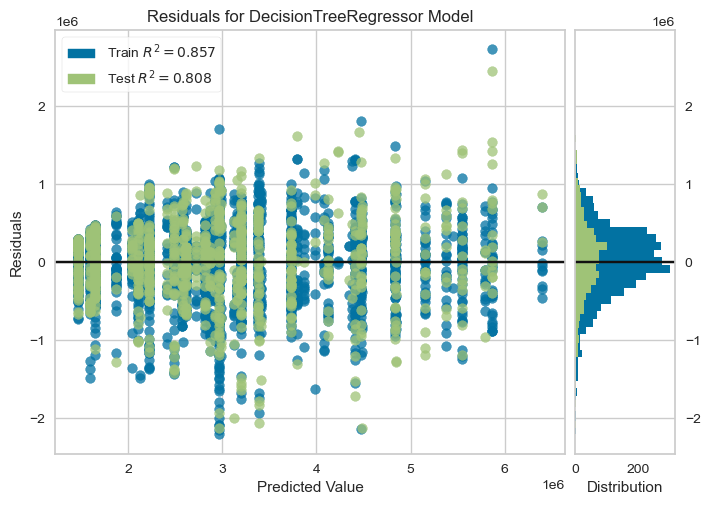

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [73]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(dt)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

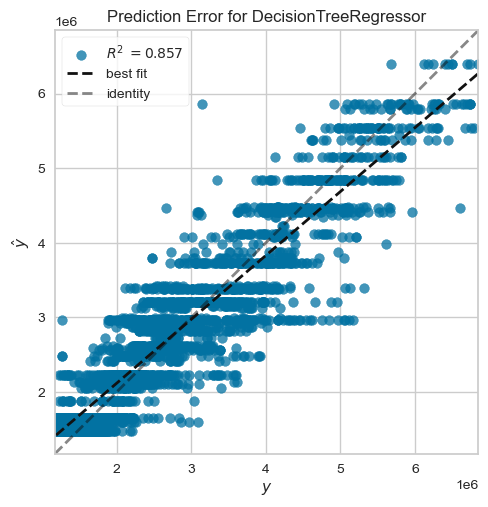

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [76]:
# Prediction erro plot
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(dt)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

In [78]:
# Plotting the observed against the predicted data
import matplotlib.pyplot as plt

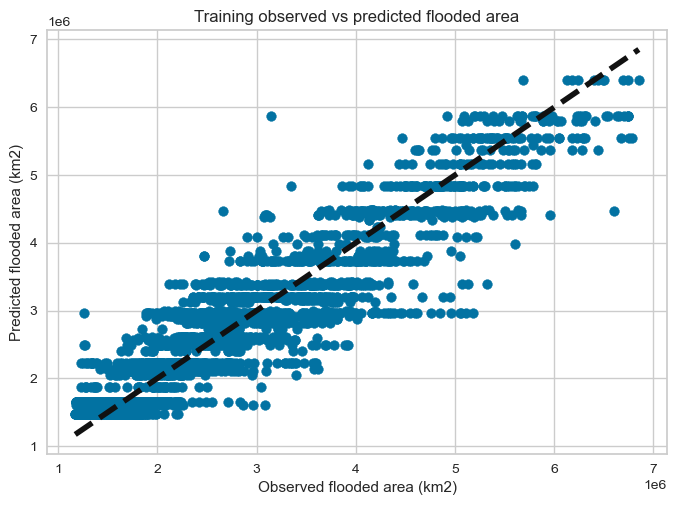

In [85]:
# For the training dataset
# Setting the boundaries and characteristics of the plot
fig, ax = plt.subplots()
ax.scatter(y_train, dt_predtr)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw = 4) # The line of best fit
# Labeling the plot
ax.set_xlabel('Observed flooded area (km2)')
ax.set_ylabel('Predicted flooded area (km2)')
plt.title('Training observed vs predicted flooded area')
plt.show()

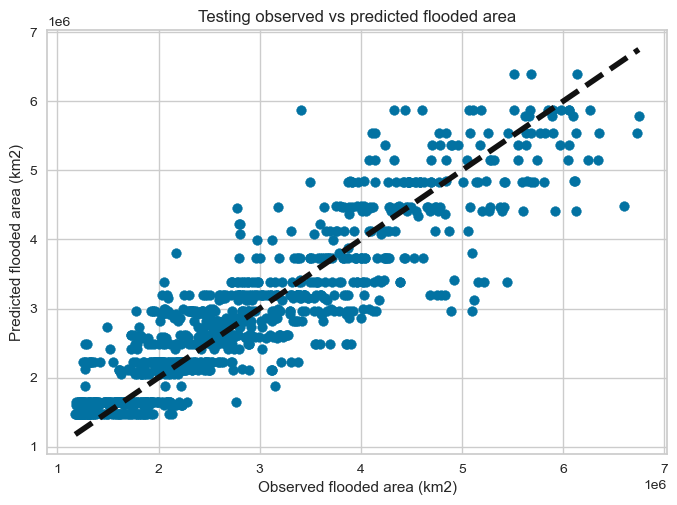

In [86]:
# For the testing dataset
# Setting the boundaries and characteristics of the plot
fig, ax = plt.subplots()
ax.scatter(y_test, dt_predts)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 4) # The line of best fit
# Labeling the plot
ax.set_xlabel('Observed flooded area (km2)')
ax.set_ylabel('Predicted flooded area (km2)')
plt.title('Testing observed vs predicted flooded area')
plt.show()

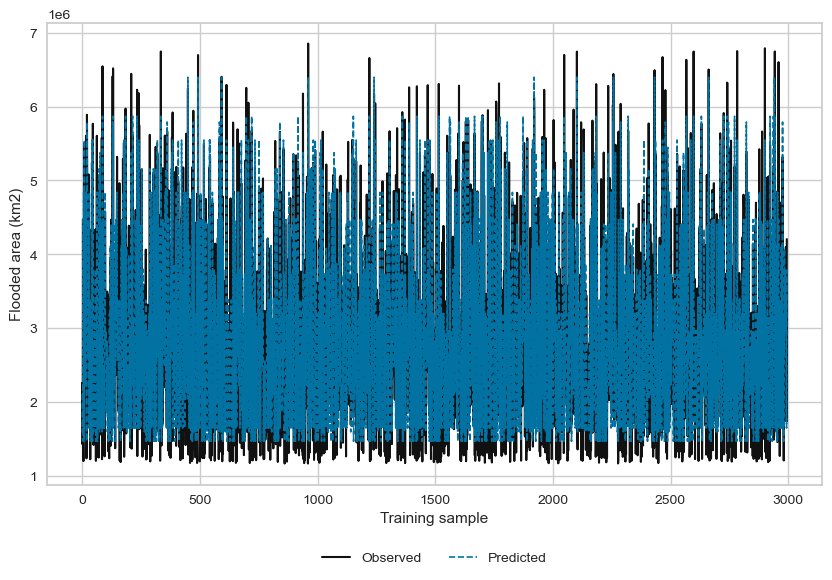

In [94]:
# Plotting the observed and predicted aata
# On the training dataset
# Setting the boundaries and characteristics
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, label = 'Observed', color = 'k', linestyle = '-', lw = 1.5)
plt.plot(x_ax, dt_predtr, label = 'Predicted', color = 'b', linestyle = '--', lw = 1.2)
# Labeling
plt.ylabel('Flooded area (km2)')
plt.xlabel('Training sample')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

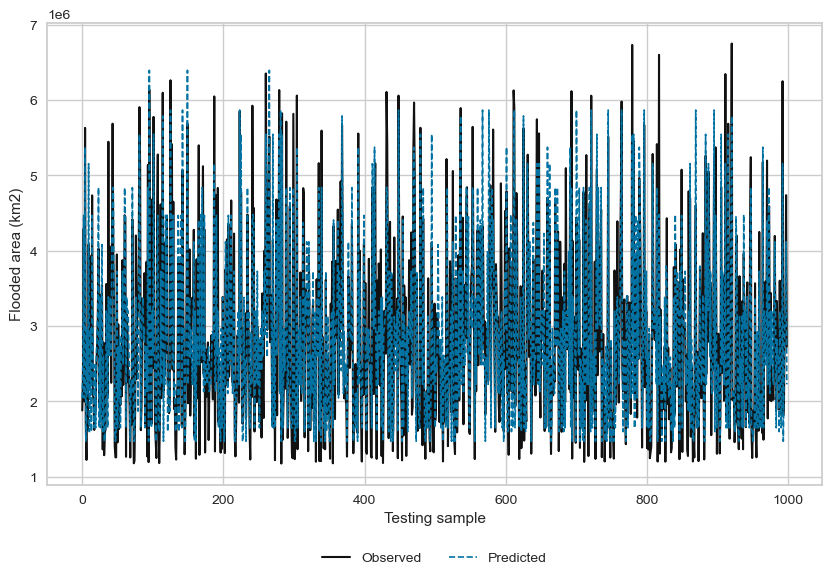

In [95]:
# Plotting the observed and predicted aata
# On the training dataset
# Setting the boundaries and characteristics
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-', lw = 1.5)
plt.plot(x_ax, dt_predts, label = 'Predicted', color = 'b', linestyle = '--', lw = 1.2)
# Labeling
plt.ylabel('Flooded area (km2)')
plt.xlabel('Testing sample')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()